<a href="https://colab.research.google.com/github/kav3569/EURO-2024-MLPrediction/blob/main/Euros2024_Preds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files=files.upload()
#uploaded = files.upload()



Saving euros2024.csv to euros2024 (1).csv
Saving euros2016.csv to euros2016 (1).csv
Saving euros2020.csv to euros2020 (1).csv


In [ ]:
import seaborn as sns

           team  total_matches  wins  draws  losses  goals_scored  \
0      Portugal             15     4      8       3          19.0   
1       Belgium             14     8      2       4          20.0   
2        France             15     7      8       0          22.0   
3       Germany             14     6      5       3          21.0   
4       Romania              7     1      3       3           6.0   
5       Austria             11     4      3       4          11.0   
6         Italy             16     8      6       2          20.0   
7         Spain             14     6      6       2          21.0   
8       England             15     6      8       1          16.0   
9   Switzerland             13     3      9       1          16.0   
10  Netherlands              8     4      2       2          12.0   
11     Slovakia             11     3      3       5           8.0   
12     Slovenia              4     0      4       0           2.0   

    goals_conceded  avg_goals_sco

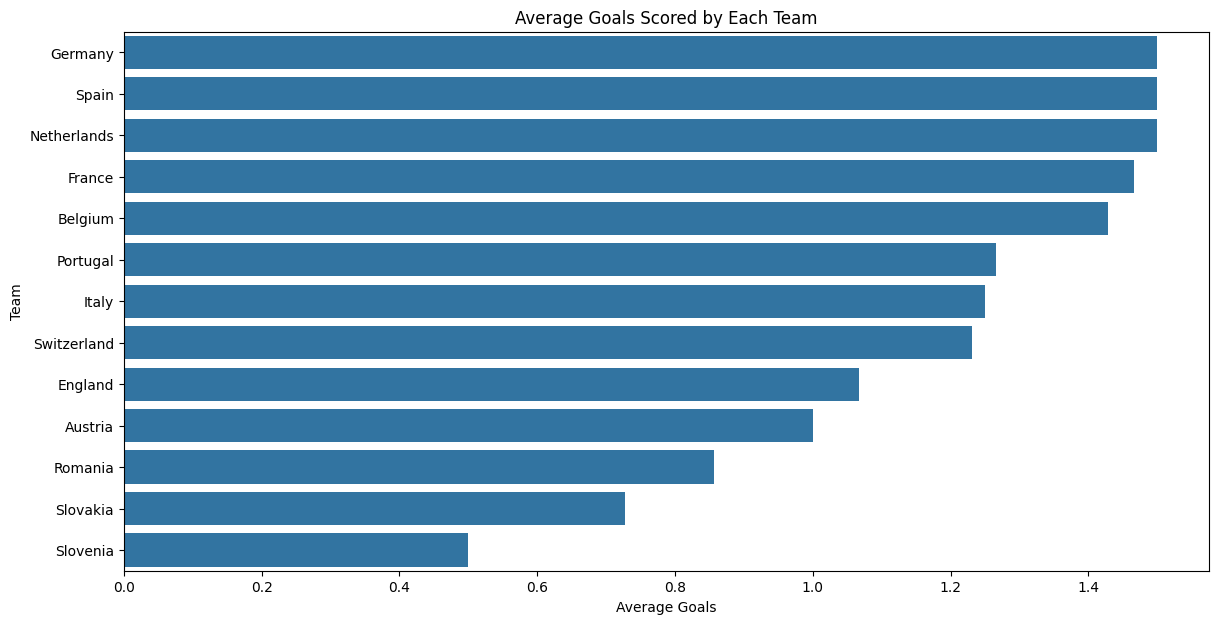

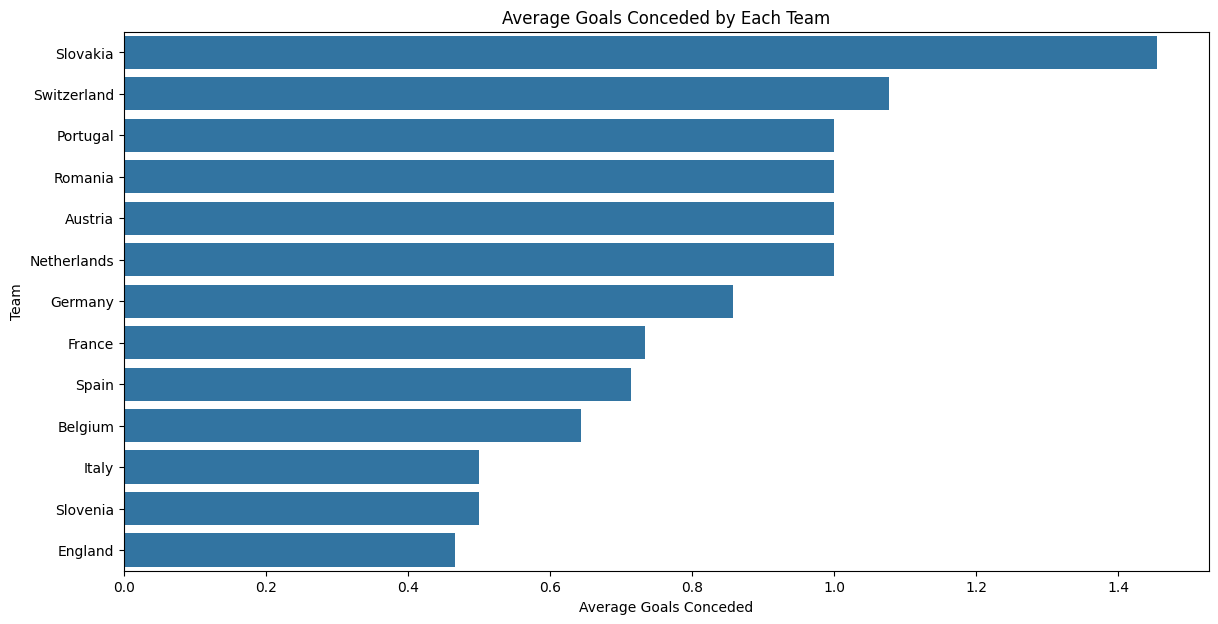

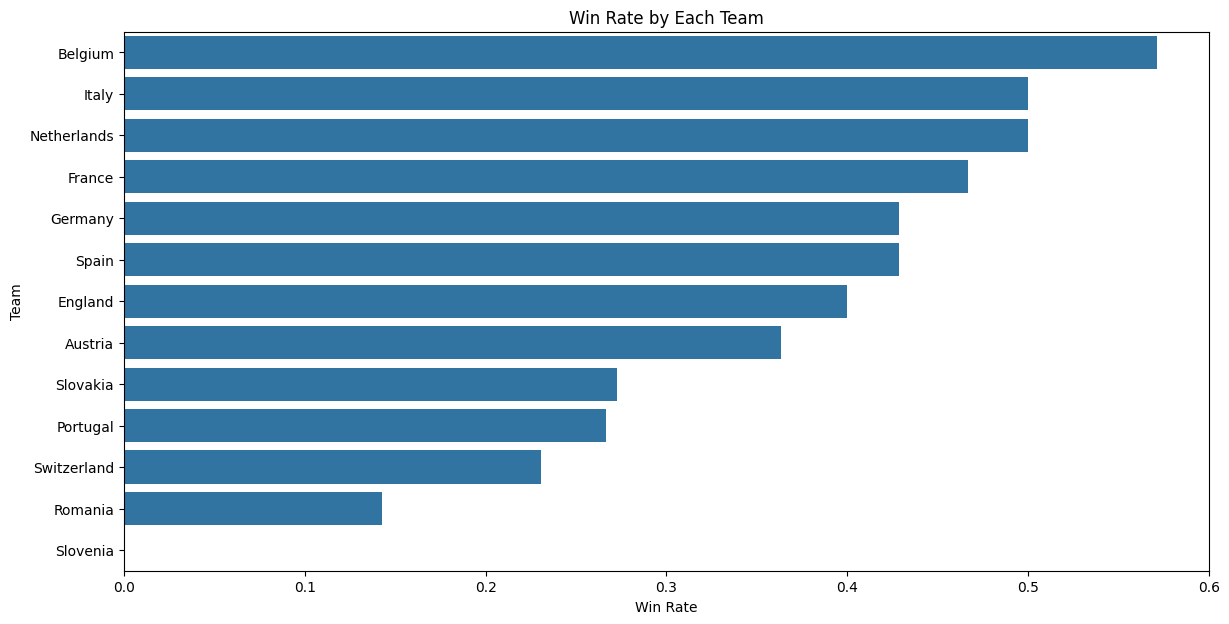

In [ ]:
euros2016 = pd.read_csv('euros2016.csv')
euros2020 = pd.read_csv('euros2020.csv')
euros2024 = pd.read_csv('euros2024.csv')


def preprocess_data(df):
    # Drop unnecessary columns
    columns_to_drop = ['home_lineups', 'away_lineups', 'home_coaches', 'away_coaches', 'events', 'stadium_name',
                       'stadium_name_media', 'stadium_name_official', 'stadium_name_event', 'stadium_name_sponsor']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Handle missing values
    df = df.fillna(0)

    return df

# Preprocess each dataset
euros2016_cleaned = preprocess_data(euros2016)
euros2020_cleaned = preprocess_data(euros2020)
euros2024_cleaned = preprocess_data(euros2024)

# Combine datasets
all_data = pd.concat([euros2016_cleaned, euros2020_cleaned, euros2024_cleaned])

# Define the selected teams
selected_teams = ['Portugal', 'Belgium', 'France', 'Germany', 'Romania', 'Austria', 'Italy', 'Spain', 'England',
                  'Switzerland', 'Turkey', 'Netherlands', 'Slovakia', 'Slovenia']

# Filter the dataset to include only matches involving the selected teams
filtered_data = all_data[
    (all_data['home_team'].isin(selected_teams)) |
    (all_data['away_team'].isin(selected_teams))
]

# Calculate statistics for each team
team_stats = []
for team in selected_teams:
    team_matches = filtered_data[
        (filtered_data['home_team'] == team) | (filtered_data['away_team'] == team)
    ]

    if team_matches.empty:
        continue

    total_matches = len(team_matches)
    wins = len(team_matches[
        ((team_matches['home_team'] == team) & (team_matches['home_score'] > team_matches['away_score'])) |
        ((team_matches['away_team'] == team) & (team_matches['away_score'] > team_matches['home_score']))
    ])
    draws = len(team_matches[team_matches['home_score'] == team_matches['away_score']])
    losses = total_matches - wins - draws
    goals_scored = team_matches.apply(lambda row: row['home_score'] if row['home_team'] == team else row['away_score'], axis=1).sum()
    goals_conceded = team_matches.apply(lambda row: row['away_score'] if row['home_team'] == team else row['home_score'], axis=1).sum()
    avg_goals_scored = goals_scored / total_matches if total_matches > 0 else 0
    avg_goals_conceded = goals_conceded / total_matches if total_matches > 0 else 0
    win_rate = wins / total_matches if total_matches > 0 else 0

    team_stats.append({
        'team': team,
        'total_matches': total_matches,
        'wins': wins,
        'draws': draws,
        'losses': losses,
        'goals_scored': goals_scored,
        'goals_conceded': goals_conceded,
        'avg_goals_scored': avg_goals_scored,
        'avg_goals_conceded': avg_goals_conceded,
        'win_rate': win_rate
    })

# Create a DataFrame with the statistics
team_stats_df = pd.DataFrame(team_stats)

# Display the statistics
print(team_stats_df)

# Plot the average goals scored by each team
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_goals_scored', y='team', data=team_stats_df.sort_values(by='avg_goals_scored', ascending=False))
plt.title('Average Goals Scored by Each Team')
plt.xlabel('Average Goals')
plt.ylabel('Team')
plt.show()

# Plot the average goals conceded by each team
plt.figure(figsize=(14, 7))
sns.barplot(x='avg_goals_conceded', y='team', data=team_stats_df.sort_values(by='avg_goals_conceded', ascending=False))
plt.title('Average Goals Conceded by Each Team')
plt.xlabel('Average Goals Conceded')
plt.ylabel('Team')
plt.show()

# Plot the win rate by each team
plt.figure(figsize=(14, 7))
sns.barplot(x='win_rate', y='team', data=team_stats_df.sort_values(by='win_rate', ascending=False))
plt.title('Win Rate by Each Team')
plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.show()


In [ ]:
def preprocess_data(df):
    # Drop unnecessary columns
    columns_to_drop = ['home_lineups', 'away_lineups', 'home_coaches', 'away_coaches', 'events', 'stadium_name',
                       'stadium_name_media', 'stadium_name_official', 'stadium_name_event', 'stadium_name_sponsor']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Handle missing values
    df = df.fillna(0)

    return df

# Preprocess each dataset
euros2016_cleaned = preprocess_data(euros2016)
euros2020_cleaned = preprocess_data(euros2020)
euros2024_cleaned = preprocess_data(euros2024)

# Combine datasets
all_data = pd.concat([euros2016_cleaned, euros2020_cleaned, euros2024_cleaned])

# Define the selected teams
selected_teams = ['Portugal', 'Belgium', 'France', 'Germany', 'Romania', 'Austria', 'Italy', 'Spain', 'England',
                  'Switzerland', 'Turkey', 'Netherlands', 'Slovakia', 'Slovenia']

# Filter the dataset to include only matches involving the selected teams
filtered_data = all_data[
    (all_data['home_team'].isin(selected_teams)) |
    (all_data['away_team'].isin(selected_teams))
]

# Display the first few rows of the filtered dataset
print(filtered_data.head())

# Save the filtered data for further use
filtered_data.to_csv('filtered_euros_selected_teams.csv', index=False)

# Calculate statistics for each team
team_stats = []
for team in selected_teams:
    team_matches = filtered_data[
        (filtered_data['home_team'] == team) | (filtered_data['away_team'] == team)
    ]

    if team_matches.empty:
        continue

    total_matches = len(team_matches)
    wins = len(team_matches[
        ((team_matches['home_team'] == team) & (team_matches['home_score'] > team_matches['away_score'])) |
        ((team_matches['away_team'] == team) & (team_matches['away_score'] > team_matches['home_score']))
    ])
    draws = len(team_matches[team_matches['home_score'] == team_matches['away_score']])
    losses = total_matches - wins - draws
    goals_scored = team_matches.apply(lambda row: row['home_score'] if row['home_team'] == team else row['away_score'], axis=1).sum()
    goals_conceded = team_matches.apply(lambda row: row['away_score'] if row['home_team'] == team else row['home_score'], axis=1).sum()
    avg_goals_scored = goals_scored / total_matches if total_matches > 0 else 0
    avg_goals_conceded = goals_conceded / total_matches if total_matches > 0 else 0
    win_rate = wins / total_matches if total_matches > 0 else 0

    team_stats.append({
        'team': team,
        'total_matches': total_matches,
        'wins': wins,
        'draws': draws,
        'losses': losses,
        'goals_scored': goals_scored,
        'goals_conceded': goals_conceded,
        'avg_goals_scored': avg_goals_scored,
        'avg_goals_conceded': avg_goals_conceded,
        'win_rate': win_rate
    })

# Create a DataFrame with the statistics
team_stats_df = pd.DataFrame(team_stats)

# Display the statistics
print(team_stats_df)




   id_match home_team away_team home_team_code away_team_code  home_score  \
0   2017907  Portugal    France            POR            FRA         0.0   
1   2017906   Germany    France            GER            FRA         0.0   
2   2017905  Portugal     Wales            POR            WAL         2.0   
3   2017904    France   Iceland            FRA            ISL         5.0   
4   2017903   Germany     Italy            GER            ITA         1.0   

   away_score  home_penalty  away_penalty  home_score_total  ...  \
0         0.0           0.0           0.0               1.0  ...   
1         2.0           0.0           0.0               0.0  ...   
2         0.0           0.0           0.0               2.0  ...   
3         2.0           0.0           0.0               5.0  ...   
4         1.0           6.0           5.0               1.0  ...   

   stadium_latitude stadium_longitude stadium_pitch_length  \
0         48.924547          2.360067                105.0   
1   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the filtered dataset
filtered_data = pd.read_csv('filtered_euros_selected_teams.csv')

# Add a target column indicating whether the home team won
filtered_data['home_win'] = (filtered_data['home_score'] > filtered_data['away_score']).astype(int)

# Features for the model
features = ['home_score', 'away_score']

X = filtered_data[features]
y = filtered_data['home_win']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction accuracy
y_pred = model.predict(X_test)
print(f"Model accuracy: {accuracy_score(y_test, y_pred)}")


Model accuracy: 1.0


In [ ]:
def preprocess_data(df):
    # Drop unnecessary columns
    columns_to_drop = ['home_lineups', 'away_lineups', 'home_coaches', 'away_coaches', 'events', 'stadium_name',
                       'stadium_name_media', 'stadium_name_official', 'stadium_name_event', 'stadium_name_sponsor']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Handle missing values
    df = df.fillna(0)

    return df

# Preprocess each dataset
euros2016_cleaned = preprocess_data(euros2016)
euros2020_cleaned = preprocess_data(euros2020)
euros2024_cleaned = preprocess_data(euros2024)

# Combine datasets
all_data = pd.concat([euros2016_cleaned, euros2020_cleaned, euros2024_cleaned])

# Define the selected teams
selected_teams = ['Portugal', 'Belgium', 'France', 'Germany', 'Romania', 'Austria', 'Italy', 'Spain', 'England',
                  'Switzerland', 'Turkey', 'Netherlands', 'Slovakia', 'Slovenia']

# Filter the dataset to include only matches involving the selected teams
filtered_data = all_data[
    (all_data['home_team'].isin(selected_teams)) |
    (all_data['away_team'].isin(selected_teams))
]

# Add a target column indicating whether the home team won
filtered_data['home_win'] = (filtered_data['home_score'] > filtered_data['away_score']).astype(int)

# Features for the model
features = ['home_score', 'away_score']

X = filtered_data[features]
y = filtered_data['home_win']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction accuracy
y_pred = model.predict(X_test)
print(f"Model accuracy: {accuracy_score(y_test, y_pred)}")

Model accuracy: 1.0


<ipython-input-14-97d8ba00ef47>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['home_win'] = (filtered_data['home_score'] > filtered_data['away_score']).astype(int)


In [ ]:
# Predict the winners of each match in the knockout stages
winners = {}
for match in round_of_16:
    home_team, away_team = round_of_16[match]['match'].split(' vs ')
    winners[match] = get_winner(home_team, away_team, model, filtered_data)

# Use the correct keys to reference previous matches in quarter_finals, semi_finals, and final
for match in quarter_finals:
    # Access the previous match keys correctly
    prev_match1 = quarter_finals[match].get('prev_match1')  # Use .get() to avoid KeyError
    prev_match2 = quarter_finals[match].get('prev_match2')

    if prev_match1 is not None and prev_match2 is not None:  # Check if keys exist
        winner1 = winners[prev_match1]
        winner2 = winners[prev_match2]
        # The keys for quarter-final winners should be 9, 10, 11, and 12
        winners[match + 8] = get_winner(winner1, winner2, model, filtered_data)
    else:
        print(f"Missing previous match information for Quarter-Final {match}")

for match in semi_finals:
    # Access the previous match keys correctly, adjusted for quarter-final keys
    prev_match1 = semi_finals[match].get('prev_match9')
    prev_match2 = semi_finals[match].get('prev_match10')

    if prev_match1 is not None and prev_match2 is not None:  # Check if keys exist
        # Access the quarter-final winners using keys 9, 10, 11, and 12
        winner1 = winners[prev_match1 + 8]
        winner2 = winners[prev_match2 + 8]
        winners[match + 12] = get_winner(winner1, winner2, model, filtered_data)
    else:
        print(f"Missing previous match information for Semi-Final {match}")

final_match = final[15]
prev_match1 = final_match.get('prev_match13')
prev_match2 = final_match.get('prev_match14')

if prev_match1 is not None and prev_match2 is not None:  # Check if keys exist
    winner1 = winners[prev_match1 + 12]
    winner2 = winners[prev_match2 + 12]
    final_winner = get_winner(winner1, winner2, model, filtered_data)
    winners[15] = final_winner
else:
    print("Missing previous match information for Final")

print("The champion is:", final_winner)

# Create a DataFrame to store the results
data = {
    'Round': ['Round of 16'] * 8 + ['Quarter-Finals'] * 4 + ['Semi-Finals'] * 2 + ['Final'],
    'Match': list(round_of_16.keys()) + list(quarter_finals.keys()) + list(semi_finals.keys()) + [15],
    'Matchup': [round_of_16[m]['match'] if m in round_of_16 else '' for m in list(round_of_16.keys()) + list(quarter_finals.keys()) + list(semi_finals.keys()) + [15]],
    'Winner': [winners.get(m, '') for m in list(round_of_16.keys()) + list(quarter_finals.keys()) + list(semi_finals.keys()) + [15]]
}

df = pd.DataFrame(data)
print(df)

# Plot the knockout bracket using NetworkX and Matplotlib
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

# Add nodes for each match
for match in df['Match']:
    G.add_node(match, label=f'Match {match}')

# Add edges representing the progression
for match in quarter_finals:
    prev_match1 = quarter_finals[match].get('prev_match1')
    prev_match2 = quarter_finals[match].get('prev_match2')
    if prev_match1 is not None and prev_match2 is not None:
        G.add_edge(prev_match1, match)
        G.add_edge(prev_match2, match)

for match in semi_finals:
    prev_match1 = semi_finals[match].get('prev_match9')
    prev_match2 = semi_finals[match].get('prev_match10')
    if prev_match1 is not None and prev_match2 is not None:
        G.add_edge(prev_match1 + 8, match + 12)
        G.add_edge(prev_match2 + 8, match + 12)

G.add_edge(13, 15)
G.add_edge(14, 15)

# Position the nodes using a hierarchical layout
pos = nx.multipartite_layout(G, subset_key='layer')

# Draw the nodes and edges
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", node_shape="s", alpha=0.7, linewidths=40)

plt.title("UEFA Euro 2024 Knockout Bracket")
plt.show()


Missing previous match information for Quarter-Final 10
Missing previous match information for Quarter-Final 11
Missing previous match information for Quarter-Final 12


KeyError: 18

The champion is: ESP
             Round  Match     Matchup Winner
0      Round of 16      1  ESP vs GEO    ESP
1      Round of 16      2  GER vs DEN    GER
2      Round of 16      3  POR vs SVN    POR
3      Round of 16      4  FRA vs BEL    FRA
4      Round of 16      5  ROU vs NED    ROU
5      Round of 16      6  AUT vs TUR    AUT
6      Round of 16      7  ENG vs SVK    ENG
7      Round of 16      8  SUI vs ITA    SUI
8   Quarter-Finals      9  ESP vs GER    ESP
9   Quarter-Finals     10  POR vs FRA    POR
10  Quarter-Finals     11  ROU vs AUT    ROU
11  Quarter-Finals     12  ENG vs SUI    ENG
12     Semi-Finals     13  ESP vs POR    ESP
13     Semi-Finals     14  ROU vs ENG    ROU
14           Final     15  ESP vs ROU    ESP


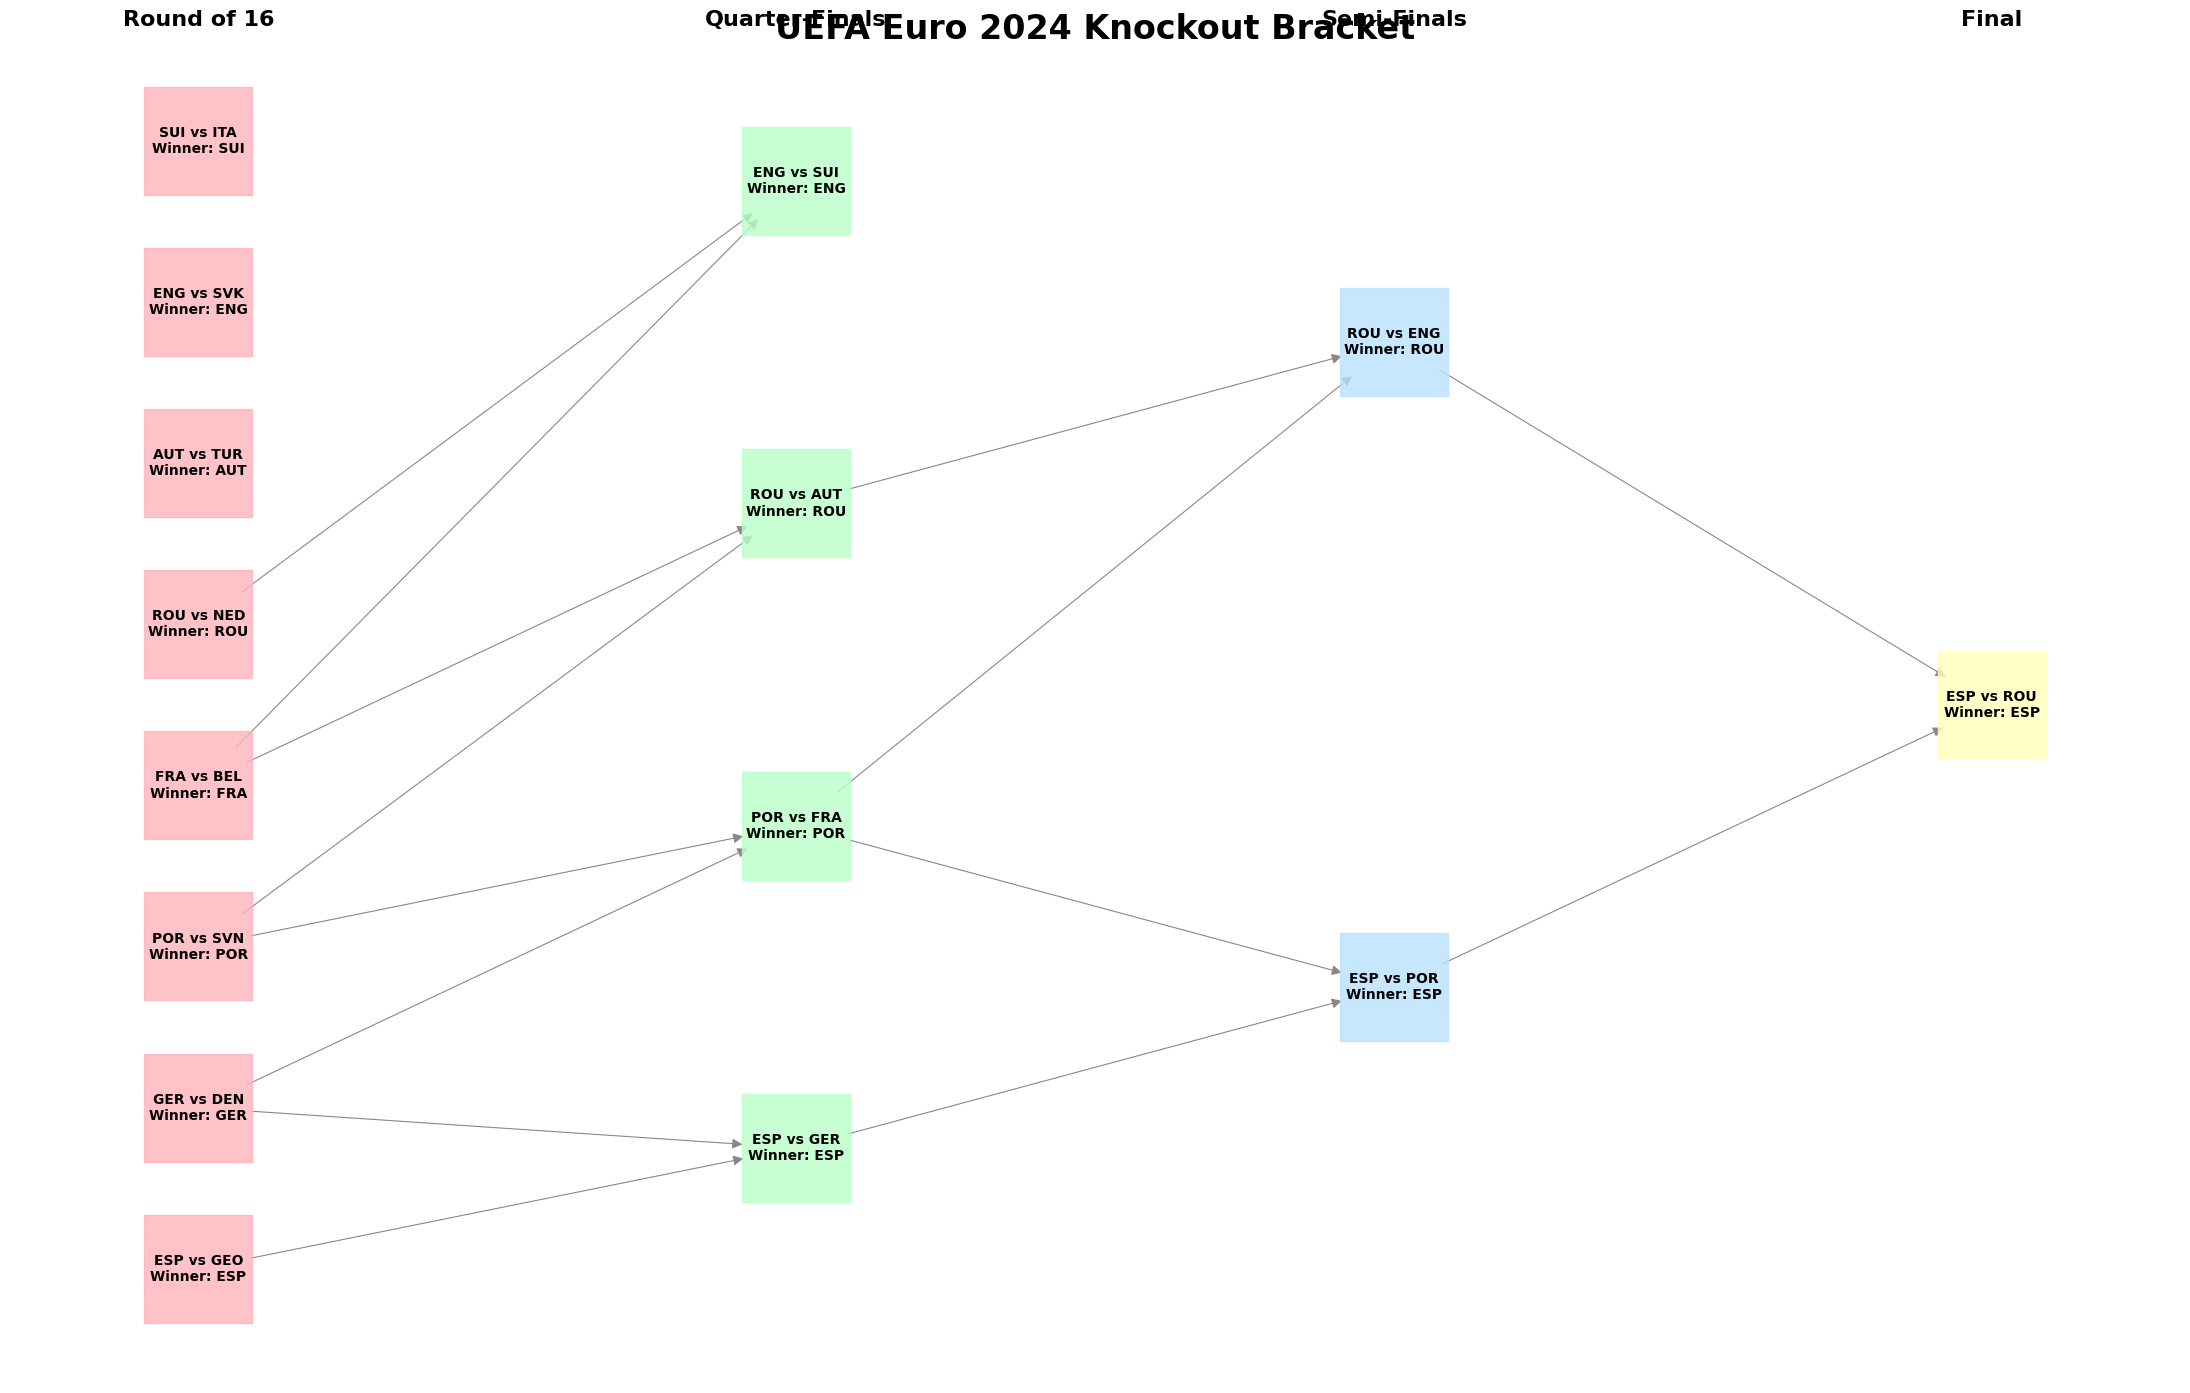

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def predict_winner(team1, team2):
    # For simplicity, let's assume team1 always wins
    return team1

# Define matches
round_of_16 = {
    1: {'match': 'ESP vs GEO'},
    2: {'match': 'GER vs DEN'},
    3: {'match': 'POR vs SVN'},
    4: {'match': 'FRA vs BEL'},
    5: {'match': 'ROU vs NED'},
    6: {'match': 'AUT vs TUR'},
    7: {'match': 'ENG vs SVK'},
    8: {'match': 'SUI vs ITA'}
}

quarter_finals = {
    9: {'prev_match1': 1, 'prev_match2': 2},
    10: {'prev_match1': 3, 'prev_match2': 4},
    11: {'prev_match1': 5, 'prev_match2': 6},
    12: {'prev_match1': 7, 'prev_match2': 8}
}

semi_finals = {
    13: {'prev_match1': 9, 'prev_match2': 10},
    14: {'prev_match1': 11, 'prev_match2': 12}
}

final = {
    15: {'prev_match1': 13, 'prev_match2': 14}
}

# Initialize winners dictionary
winners = {}

# Predict winners for Round of 16
for match, info in round_of_16.items():
    team1, team2 = info['match'].split(' vs ')
    winner = predict_winner(team1, team2)
    winners[match] = winner

# Predict winners for Quarter-Finals
for match, info in quarter_finals.items():
    prev_match1 = info['prev_match1']
    prev_match2 = info['prev_match2']
    winner1 = winners[prev_match1]
    winner2 = winners[prev_match2]
    winner = predict_winner(winner1, winner2)
    winners[match] = winner

# Predict winners for Semi-Finals
for match, info in semi_finals.items():
    prev_match1 = info['prev_match1']
    prev_match2 = info['prev_match2']
    winner1 = winners[prev_match1]
    winner2 = winners[prev_match2]
    winner = predict_winner(winner1, winner2)
    winners[match] = winner

# Predict winner for Final
prev_match1 = final[15]['prev_match1']
prev_match2 = final[15]['prev_match2']
winner1 = winners[prev_match1]
winner2 = winners[prev_match2]
final_winner = predict_winner(winner1, winner2)
winners[15] = final_winner

print("The champion is:", final_winner)

# Create DataFrame for visualization
data = {
    'Round': ['Round of 16'] * 8 + ['Quarter-Finals'] * 4 + ['Semi-Finals'] * 2 + ['Final'],
    'Match': list(range(1, 16)),
    'Matchup': [],
    'Winner': []
}

for match in range(1, 16):
    if match in round_of_16:
        data['Matchup'].append(round_of_16[match]['match'])
    elif match in quarter_finals:
        prev_match1 = quarter_finals[match]['prev_match1']
        prev_match2 = quarter_finals[match]['prev_match2']
        data['Matchup'].append(f"{winners[prev_match1]} vs {winners[prev_match2]}")
    elif match in semi_finals:
        prev_match1 = semi_finals[match]['prev_match1']
        prev_match2 = semi_finals[match]['prev_match2']
        data['Matchup'].append(f"{winners[prev_match1]} vs {winners[prev_match2]}")
    elif match in final:
        prev_match1 = final[match]['prev_match1']
        prev_match2 = final[match]['prev_match2']
        data['Matchup'].append(f"{winners[prev_match1]} vs {winners[prev_match2]}")

    data['Winner'].append(winners.get(match, ''))

df = pd.DataFrame(data)
print(df)

# Create the graph
G = nx.DiGraph()

# Add nodes and edges
for i, row in df.iterrows():
    G.add_node(row['Match'], label=f"{row['Matchup']}\nWinner: {row['Winner']}", layer=row['Round'])
    if row['Round'] == 'Quarter-Finals':
        G.add_edge(row['Match'] - 8, row['Match'])
        G.add_edge(row['Match'] - 7, row['Match'])
    elif row['Round'] == 'Semi-Finals':
        G.add_edge(row['Match'] - 4, row['Match'])
        G.add_edge(row['Match'] - 3, row['Match'])
    elif row['Round'] == 'Final':
        G.add_edge(13, row['Match'])
        G.add_edge(14, row['Match'])

# Custom layout function
def custom_layout(G):
    pos = {}
    layers = {'Round of 16': 0, 'Quarter-Finals': 1, 'Semi-Finals': 2, 'Final': 3}
    for node in G.nodes():
        layer = G.nodes[node]['layer']
        if layer == 'Round of 16':
            pos[node] = (layers[layer], (node - 1) * 2)
        elif layer == 'Quarter-Finals':
            pos[node] = (layers[layer], (node - 9) * 4 + 1.5)
        elif layer == 'Semi-Finals':
            pos[node] = (layers[layer], (node - 13) * 8 + 3.5)
        else:  # Final
            pos[node] = (layers[layer], 7)
    return pos

# Get positions
pos = custom_layout(G)

# Set up the plot
plt.figure(figsize=(22, 14))
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Draw edges (reduced width)
nx.draw_networkx_edges(G, pos, edge_color='#888888', arrows=True, arrowsize=15, node_size=6000, width=0.8)

# Draw nodes
node_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA']
for layer, color in zip(['Round of 16', 'Quarter-Finals', 'Semi-Finals', 'Final'], node_colors):
    node_list = [node for node in G.nodes() if G.nodes[node]['layer'] == layer]
    nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_size=6000, node_color=color, alpha=0.8, node_shape='s')

# Add labels (increased font size)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')

# Add round labels
round_positions = {'Round of 16': 0, 'Quarter-Finals': 1, 'Semi-Finals': 2, 'Final': 3}
for round_name, x_pos in round_positions.items():
    plt.text(x_pos, 15.5, round_name, ha='center', va='center', fontsize=16, fontweight='bold')

# Set title
plt.title("UEFA Euro 2024 Knockout Bracket", fontsize=24, fontweight='bold', pad=20)

# Remove axis
plt.axis('off')

# Add a subtle border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#cccccc')
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.show()